In [10]:
from finite_T_FMT import *
from matplotlib import pyplot as plt
from finite_T_FMT import *
import pandas as pd
from glob import glob as gb
from scipy.interpolate import interp1d as in1
from scipy.interpolate import griddata, bisplrep, bisplev
from TOV_script import TOV, mixed_WD
import scipy.special as spec
import mpl_style as mplt
import glob
import matplotlib.patheffects as pe

plt.style.use(['mvstyle', 'one_piece'])


# Mass Rad

In [3]:
elems = ['C', 'O']
files = gb('../../FMT_final/FMT_EoS*.dat')

T=0

for elem in elems:
    res_dir = 'results/{}/{:0.3e}/'.format(elem, T)
    data = pd.read_csv('../../FMT_final/FMT_EoS_{}.dat'.format(elem), header=0, sep='\t')
    
    data = data.rename(columns={'xWS': 'xWS', 'rho[kg/m^3]':'rho[g/cm^3]', 'n_e[m^-3]':'n_e[pm^-3]', 'P[N/m^2]':'P[N/m^2]', 'muFe[Joules]':'mu_F_e[MeV]'})
    data['rho[g/cm^3]'] = data['rho[g/cm^3]']*kgTOg/mTOcm**3
    data['n_e[pm^-3]'] = data['n_e[pm^-3]']/mTOpm**3
    data['mu_F_e[MeV]'] = data['mu_F_e[MeV]']*6.242e12
    
    if not os.path.isdir('{}EoS/'.format(res_dir)):
        os.system('mkdir -p {}EoS/'.format(res_dir))
    
    data.to_csv('{}EoS/FMT_finite_T.dat'.format(res_dir), sep = '\t', index=False, float_format='%.5e')
    data.to_csv('EoS_Files/FMT_{:0.3e}K_{}_EoS.dat'.format(T, elem), sep = '\t', index=False, float_format='%.5e')

FileNotFoundError: [Errno 2] No such file or directory: '../../FMT_final/FMT_EoS_C.dat'

In [14]:
data

,xWS,rho[g/cm^3],n_e[pm^-3],P[N/m^2],mu_F_e[MeV]
0,0.001000,2.277050e+24,1.516110e+06,4.258540e+30,6.962639e+01
1,0.001023,2.124900e+24,1.516210e+06,4.258930e+30,6.962764e+01
2,0.001047,1.982920e+24,1.516310e+06,4.259300e+30,6.962951e+01
3,0.001072,1.850430e+24,1.516410e+06,4.259670e+30,6.963076e+01
4,0.001097,1.726790e+24,1.516510e+06,4.260030e+30,6.963263e+01
...,...,...,...,...,...
895,911917.000000,2.947580e-03,3.923050e-12,2.440400e+03,9.070937e-09
896,933183.000000,2.750630e-03,3.397720e-12,1.464240e+03,8.241937e-09
897,954944.000000,2.566840e-03,3.134040e-12,1.952320e+03,7.809803e-09
898,977212.000000,2.395330e-03,2.634700e-12,9.761610e+02,6.956522e-09


In [80]:
eos1 = pd.read_csv('EoS_Files/FMT_1.000e+08K_C_EoS.dat', sep = '\t', header=0)
eos2 = pd.read_csv('EoS_Files/FMT_1.000e+07K_C_EoS.dat', sep = '\t', header=0)
eos3 = pd.read_csv('EoS_Files/FMT_1.000e+06K_C_EoS.dat', sep = '\t', header=0)
eos4 = pd.read_csv('EoS_Files/FMT_1.000e+05K_C_EoS.dat', sep = '\t', header=0)
eos5 = pd.read_csv('EoS_Files/FMT_1.000e+04K_C_EoS.dat', sep = '\t', header=0)
eos6 = pd.read_csv('EoS_Files/FMT_0.000e+00K_C_EoS.dat', sep='\t', header=0)


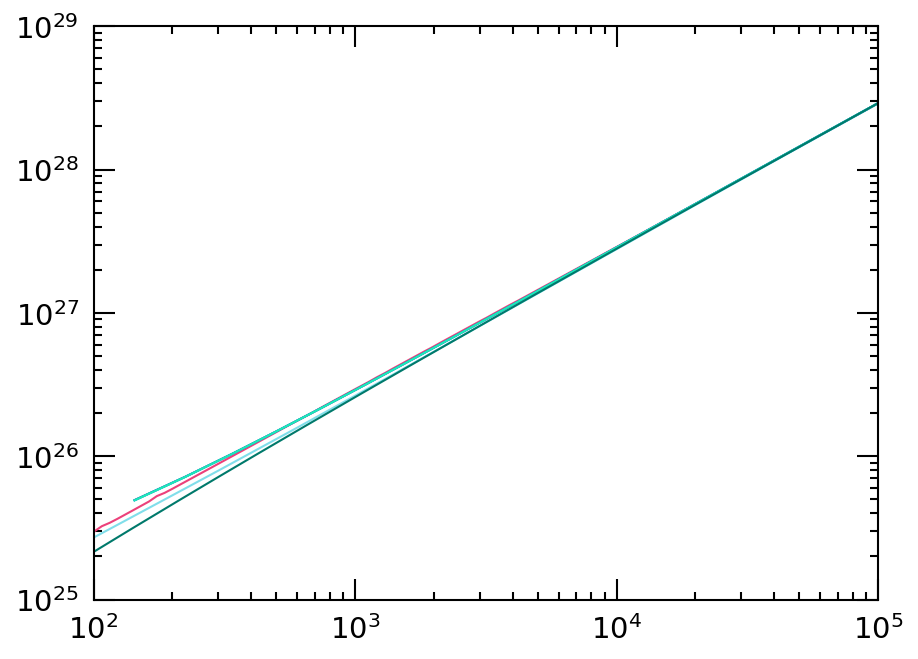

In [84]:
plt.loglog(eos1['rho[g/cm^3]'], eos1['n_e[pm^-3]']/(pmTOm*mTOcm)**3)
plt.loglog(eos2['rho[g/cm^3]'], eos2['n_e[pm^-3]']/(pmTOm*mTOcm)**3)
plt.loglog(eos3['rho[g/cm^3]'], eos3['n_e[pm^-3]']/(pmTOm*mTOcm)**3)
plt.loglog(eos4['rho[g/cm^3]'], eos4['n_e[pm^-3]']/(pmTOm*mTOcm)**3)
plt.loglog(eos5['rho[g/cm^3]'], eos5['n_e[pm^-3]']/(pmTOm*mTOcm)**3)
plt.loglog(eos6['rho[g/cm^3]'], eos6['n_e[pm^-3]']/(pmTOm*mTOcm)**3)
plt.xlim(1e2, 1e5)
plt.ylim(1e25, 1e29)
plt.yscale('log')


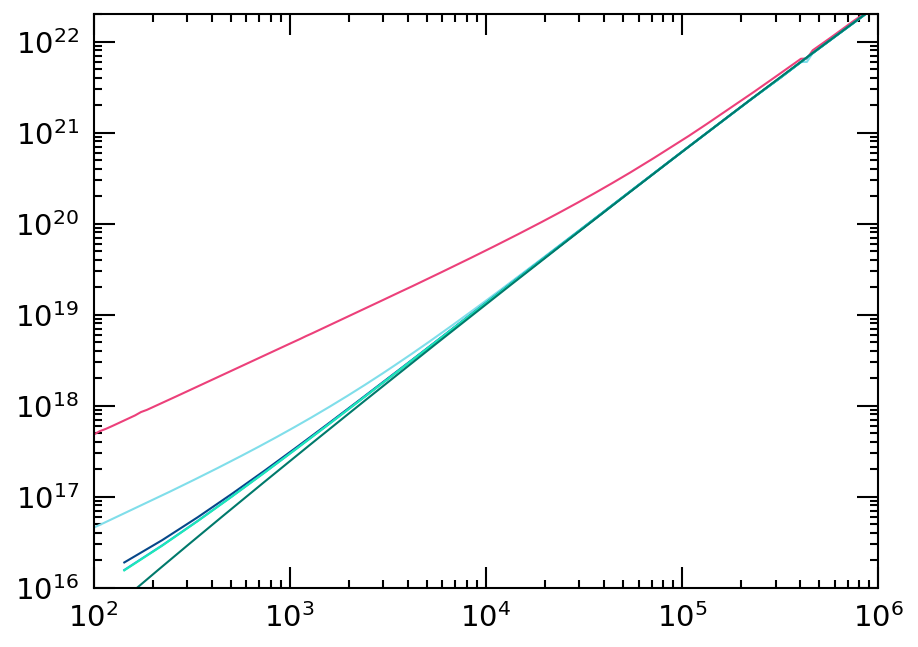

In [91]:
plt.loglog(eos1['rho[g/cm^3]'], eos1['P[N/m^2]']*10)
plt.loglog(eos2['rho[g/cm^3]'], eos2['P[N/m^2]']*10)
plt.loglog(eos3['rho[g/cm^3]'], eos3['P[N/m^2]']*10)
plt.loglog(eos4['rho[g/cm^3]'], eos4['P[N/m^2]']*10)
plt.loglog(eos5['rho[g/cm^3]'], eos5['P[N/m^2]']*10)
plt.loglog(eos6['rho[g/cm^3]'], eos6['P[N/m^2]']*10)
plt.xlim(100, 1e6)
plt.ylim(1e16, 2e22)
plt.yscale('log')


In [ ]:
1/round(R_scale)

2.8960324355632783e-05

# Better FD integration

(2, 10000000.0)

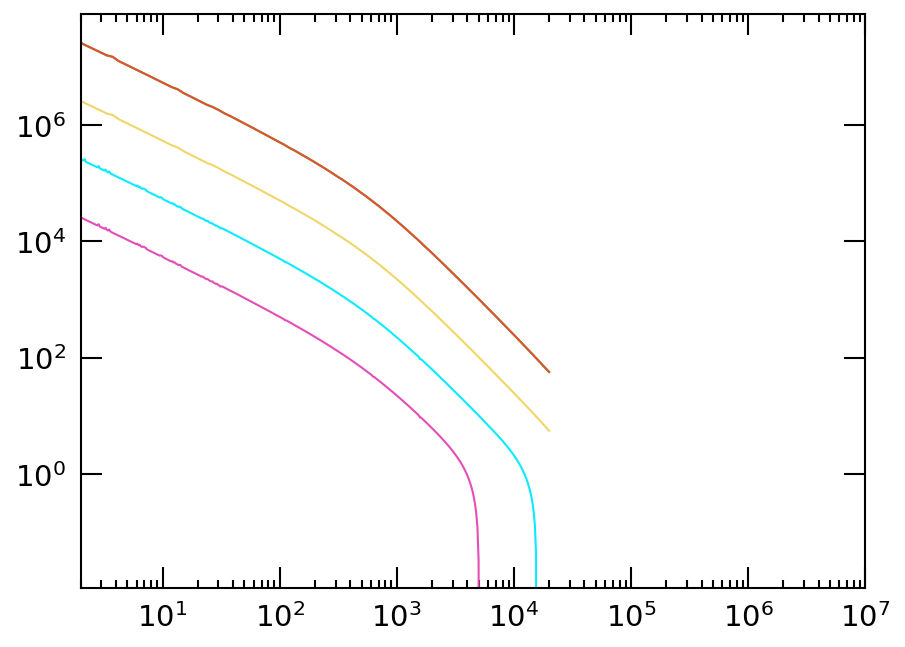

In [10]:
plt.loglog(eos1['xWS'], eos1['mu_F_e[MeV]']/(kBMeV*1e8))
plt.loglog(eos2['xWS'], eos2['mu_F_e[MeV]']/(kBMeV*1e7))
plt.loglog(eos3['xWS'], eos3['mu_F_e[MeV]']/(kBMeV*1e6))
plt.loglog(eos4['xWS'], eos4['mu_F_e[MeV]']/(kBMeV*1e5))
plt.loglog(eos5['xWS'], eos5['mu_F_e[MeV]']/(kBMeV*1e5))
plt.xlim(2, 1e7)
# plt.ylim(1e26, 1e30)

In [ ]:
from finite_T_FMT import *

In [ ]:
from finite_T_FMT import *
from matplotlib import pyplot as plt
from scipy.integrate import quad as quad
elem = elem_data("C", 1e5)

elem.Delta  

1.069677042515383

In [ ]:
# ode_solver( 7.49894e4, 0.03404647712850094, params=[elem.Delta, elem.xc, kBMeV*1e5/mE], elem='C')

In [ ]:
beta = kBMeV*1e5/mE
eta = 0.1/7e4/lampi/mE/beta
k=1/2
print(eta)
print(max((eta-10), 0), max((eta+10), 0))
def alpha(t):
    return (np.exp(t-eta)*gen_FD_f(t, beta, k))/((np.exp(t-eta) + 1))**2

23.137860317222763
13.137860317222763 33.13786031722276


In [ ]:
xx = np.linspace(max((eta-10), 0), max((eta+10), 0), 100)
yy = alpha(xx)

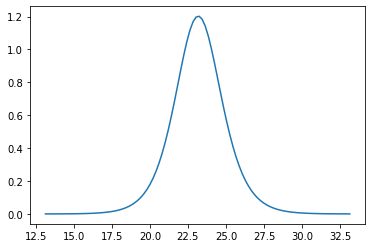

In [ ]:
plt.plot(xx, yy)

# MR 2

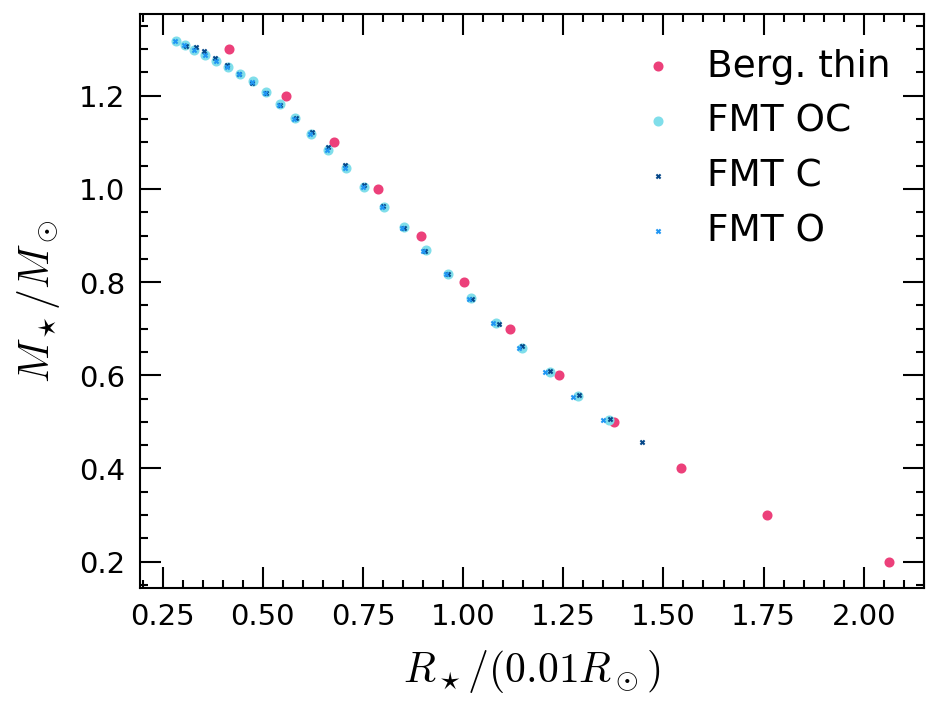

In [25]:
plt.scatter(berg_R, berg_M, label = 'Berg. thin', s=2)
plt.scatter(OC_7['R']/(0.01*Rsol), OC_7['M'], label='FMT OC', s=2)
plt.scatter(C_7['R']/(0.01*Rsol), C_7['M'], label='FMT C', s=1, marker='x')
plt.scatter(O_7['R']/(0.01*Rsol), O_7['M'], label='FMT O', s=1, marker='x')
plt.xlabel(r'$R_\star/(0.01 R_\odot)$')
plt.ylabel(r'$M_\star/M_\odot$')
plt.legend()


In [4]:
from TOV_script import mixed_WD, TOV, MR_plotter

In [5]:
berg_R = np.array([1.436e9, 1.224e9, 1.075e9, 9.59e8, 8.627e8, 7.77e8, 6.98e8, 6.228e8, 5.483e8, 4.715e8, 3.88e8, 2.8876e8])*cmTOm/(0.01*Rsol)
berg_M = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3])

C_7 = pd.read_csv('Mass_Radius/MR_C_1.000e+07.dat', header = 0, sep='\t')
O_7 = pd.read_csv('Mass_Radius/MR_O_1.000e+07.dat', header = 0, sep='\t')
OC_7 = pd.read_csv('Mass_Radius/MR_OC_1.000e+07.dat', header=0, sep='\t')


FileNotFoundError: [Errno 2] No such file or directory: 'Mass_Radius/MR_C_1.000e+07.dat'

(<Figure size 1050x810 with 1 Axes>,
 <AxesSubplot:xlabel='$R_\\star/(0.01\\,R_\\odot)$', ylabel='$M_\\star/M_\\odot$'>)

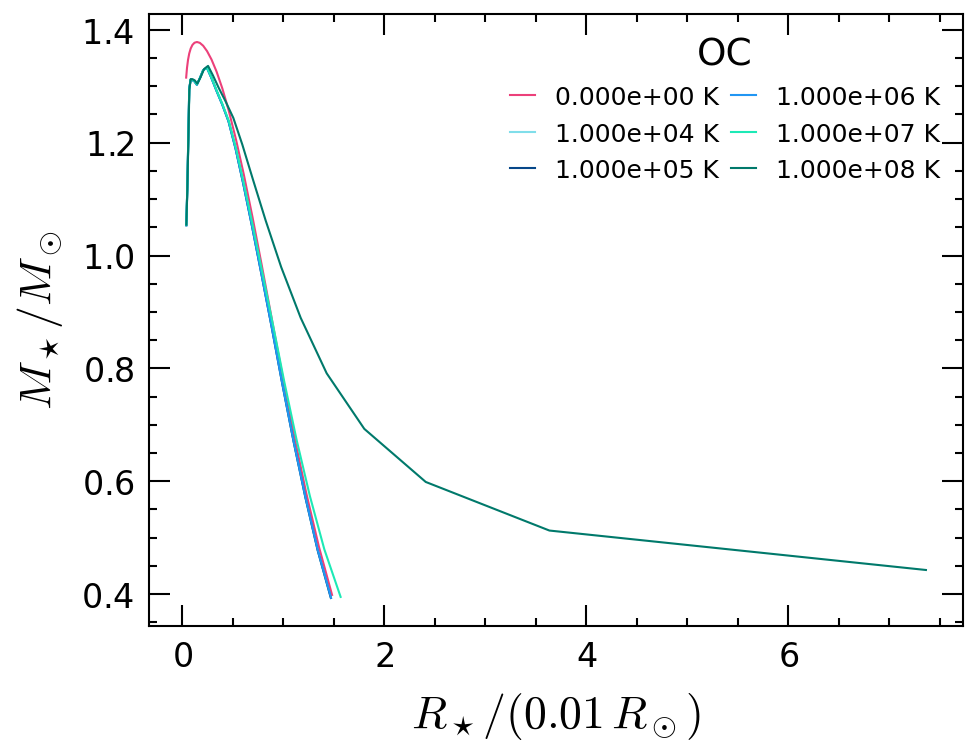

In [4]:
MR_plotter(elem = 'OC')


IndexError: list index out of range

# Profiles

In [2]:
all_profiles = gb("results/*/**/profiles/***/profiles.dat")
cent_profs   = gb("results/*/**/profiles/***/profile_central.dat")

def filter_profs(profs, elem, T, M):
    T = '{:0.3e}'.format(T)
    M = '{:0.3f}'.format(M)

    file = [x for x in profs if elem in x]
    file = [x for x in file if T in x]
    file = [x for x in file if M in x]

    return file[0]


In [3]:
elem = 'C'

prof_data_1 = pd.read_csv(filter_profs(all_profiles, f'{elem}', 0  , 0.44), header=0, sep = '\t')
prof_data_2 = pd.read_csv(filter_profs(all_profiles, f'{elem}', 0  , 1.017), header=0, sep = '\t')
prof_data_3 = pd.read_csv(filter_profs(all_profiles, f'{elem}', 0  , 1.257), header=0, sep = '\t')
prof_data_4 = pd.read_csv(filter_profs(all_profiles, f'{elem}', 0  , 1.384), header=0, sep = '\t')


In [4]:
(prof_data_1['rho[kg/m^3]']*kgTOg/mTOcm**3)[0]/1e6, (prof_data_2['rho[kg/m^3]']*kgTOg/mTOcm**3)[0]/1e7, (prof_data_3['rho[kg/m^3]']*kgTOg/mTOcm**3)[0]/1e8, (prof_data_4['rho[kg/m^3]']*kgTOg/mTOcm**3)[0]/1e10

(1.4664906276152254, 3.8399336486489193, 3.1315895219164807, 2.305207035200755)

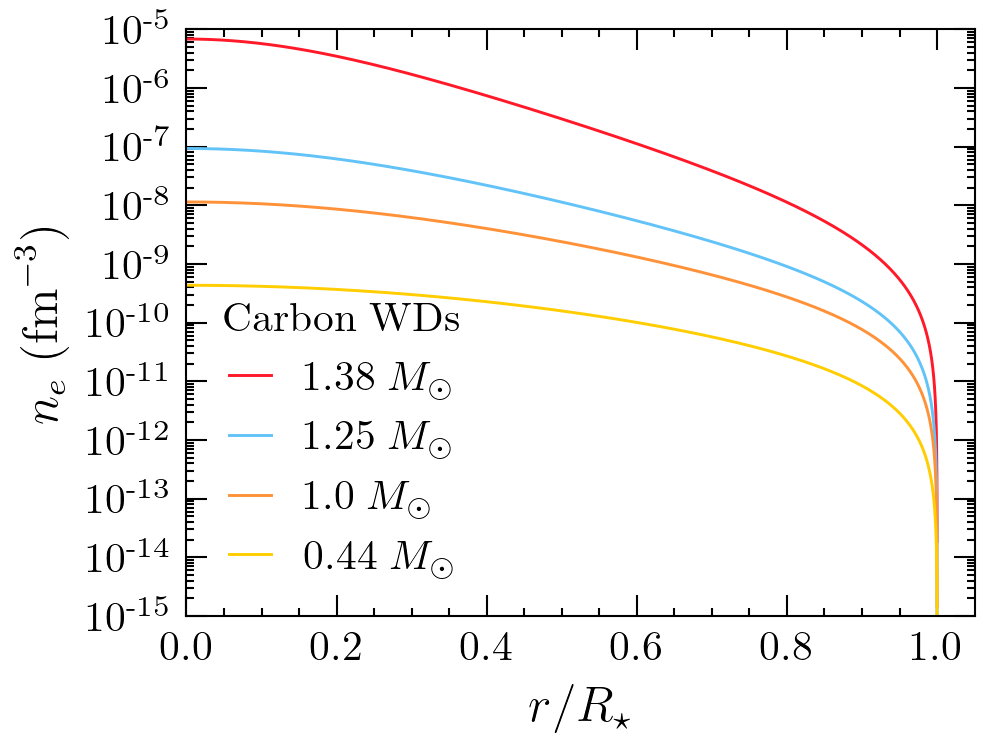

In [5]:
fig, ax = plt.subplots()

mplt.loglog(ax, prof_data_4['r[m]']/prof_data_4['r[m]'].iloc[-1], prof_data_4['ne[pm^-3]']/1000**3, label = r'$1.38\;M_\odot$')
mplt.loglog(ax, prof_data_3['r[m]']/prof_data_3['r[m]'].iloc[-1], prof_data_3['ne[pm^-3]']/1000**3, label = r'$1.25\;M_\odot$')
mplt.loglog(ax, prof_data_2['r[m]']/prof_data_2['r[m]'].iloc[-1], prof_data_2['ne[pm^-3]']/1000**3, label = r'$1.0\;M_\odot$')
mplt.loglog(ax, prof_data_1['r[m]']/prof_data_1['r[m]'].iloc[-1], prof_data_1['ne[pm^-3]']/1000**3, label = r'$0.44\;M_\odot$')

plt.ylim(1e-15, 1e-5)
plt.xscale('linear')
plt.xlim(0, 1.05)

plt.xlabel(r'$r/R_\star$')
# plt.xlabel(r'$r\;(\mathrm{km})$')
plt.ylabel(r'$n_e\;(\mathrm{fm}^{-3})$')

plt.legend(title = r'$\mathrm{Carbon\; WDs}$')

plt.savefig('./plots/ne_prof.pdf')

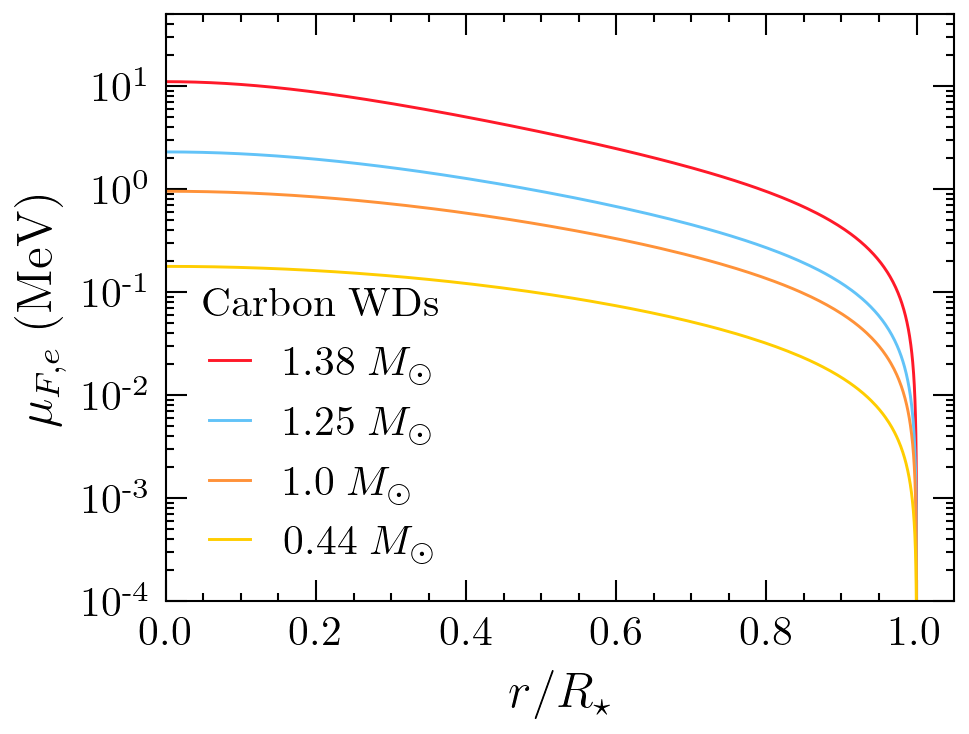

In [24]:
fig, ax = plt.subplots()

mplt.loglog(ax, prof_data_4['r[m]']/prof_data_4['r[m]'].iloc[-1], prof_data_4['muF_e[MeV]'], label = r'$1.38\;M_\odot$')
mplt.loglog(ax, prof_data_3['r[m]']/prof_data_3['r[m]'].iloc[-1], prof_data_3['muF_e[MeV]'], label = r'$1.25\;M_\odot$')
mplt.loglog(ax, prof_data_2['r[m]']/prof_data_2['r[m]'].iloc[-1], prof_data_2['muF_e[MeV]'], label = r'$1.0\;M_\odot$')
mplt.loglog(ax, prof_data_1['r[m]']/prof_data_1['r[m]'].iloc[-1], prof_data_1['muF_e[MeV]'], label = r'$0.44\;M_\odot$')

plt.ylim(1e-4, 5e1)
plt.xscale('linear')
plt.xlim(0, 1.05)

plt.xlabel(r'$r/R_\star$')
# plt.xlabel(r'$r\;(\mathrm{km})$')
plt.ylabel(r'$\mu_{F,e}\;(\mathrm{MeV})$')

plt.legend(title = r'$\mathrm{Carbon\; WDs}$')

plt.savefig('./plots/muFe_prof.pdf')


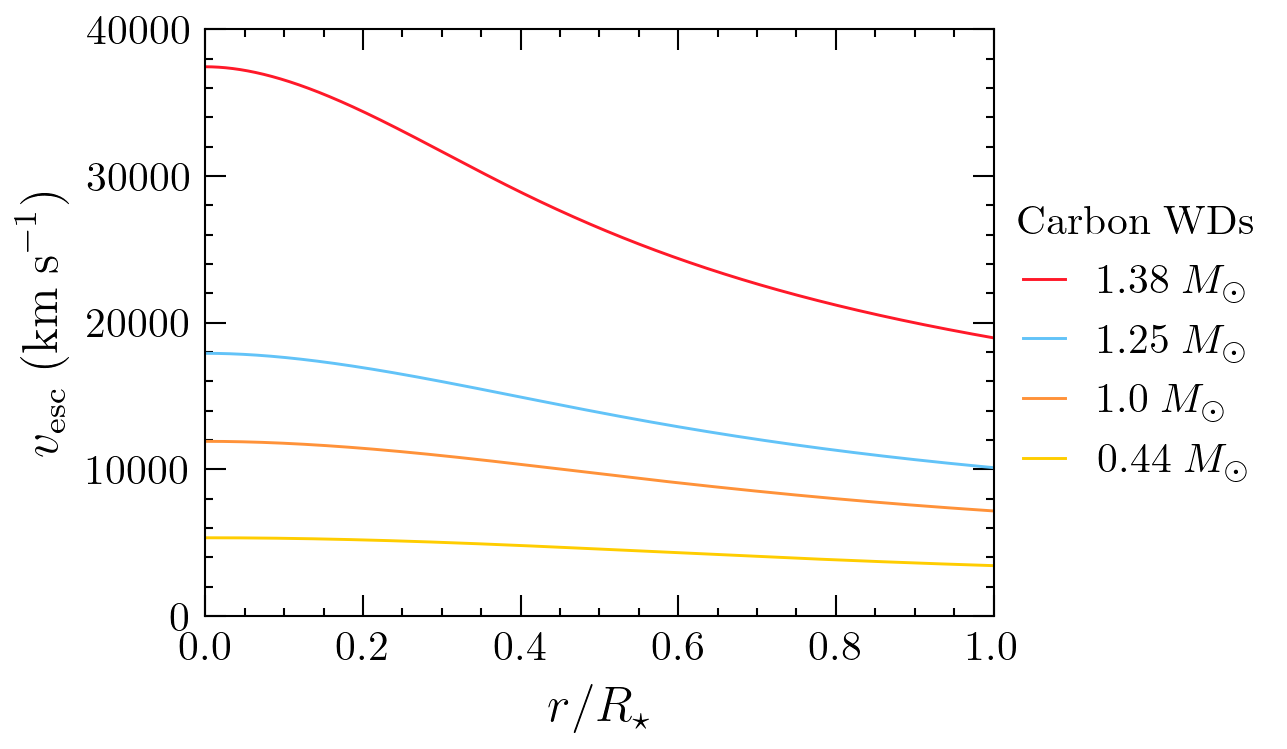

In [22]:
fig, ax = plt.subplots()

mplt.loglog(ax, prof_data_4['r[m]']/prof_data_4['r[m]'].iloc[-1], np.sqrt(1.0 - prof_data_4['B']) * cspeed * mTOkm, label = r'$1.38\;M_\odot$')
mplt.loglog(ax, prof_data_3['r[m]']/prof_data_3['r[m]'].iloc[-1], np.sqrt(1.0 - prof_data_3['B']) * cspeed * mTOkm, label = r'$1.25\;M_\odot$')
mplt.loglog(ax, prof_data_2['r[m]']/prof_data_2['r[m]'].iloc[-1], np.sqrt(1.0 - prof_data_2['B']) * cspeed * mTOkm, label = r'$1.0\;M_\odot$')
mplt.loglog(ax, prof_data_1['r[m]']/prof_data_1['r[m]'].iloc[-1], np.sqrt(1.0 - prof_data_1['B']) * cspeed * mTOkm, label = r'$0.44\;M_\odot$')

# plt.ylim(1e-15, 1e-5)
plt.xscale('linear')
plt.yscale('linear')
plt.xlim(0, 1)

plt.ylim(0, 40000)

plt.xlabel(r'$r/R_\star$')
# plt.xlabel(r'$r\;(\mathrm{km})$')
plt.ylabel(r'$v_\mathrm{esc}\;(\mathrm{km\;s}^{-1})$')

plt.legend(title = r'$\mathrm{Carbon\; WDs}$', ncol=1, loc = (1.01, 0.2))

plt.savefig('./plots/vesc_prof.pdf')

NameError: name 'prof_data_5' is not defined

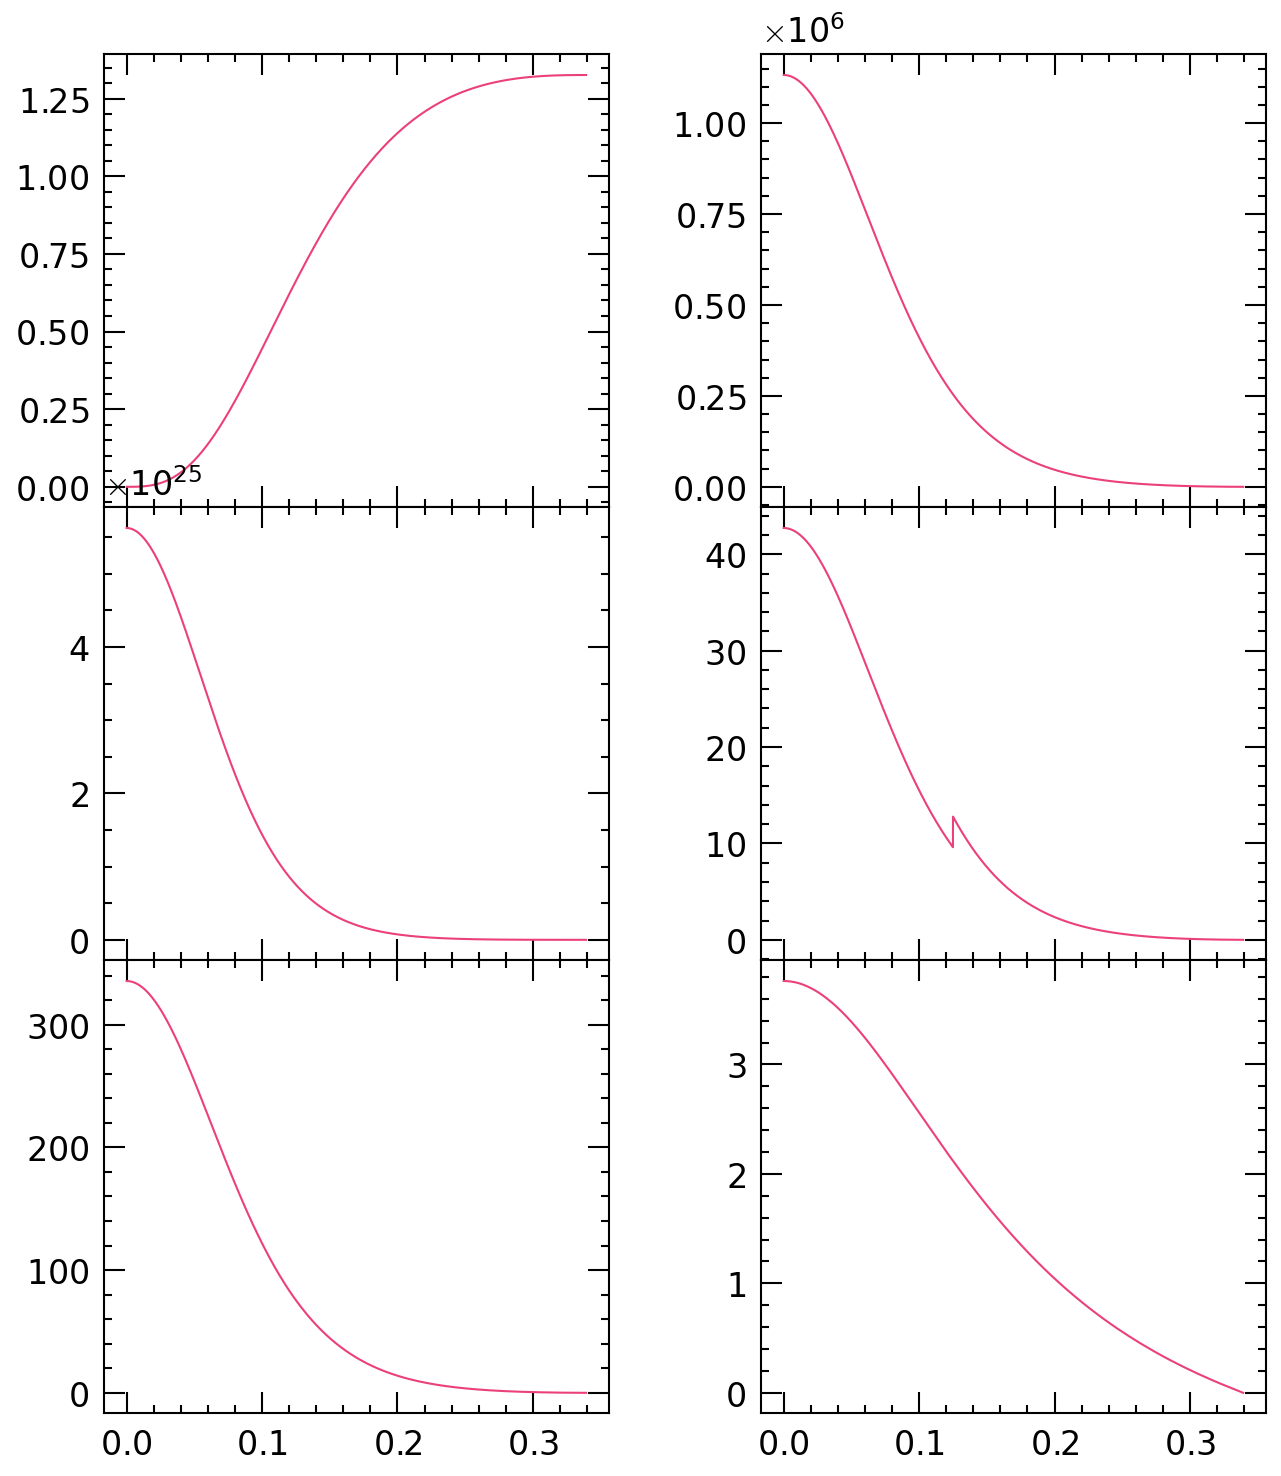

In [6]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(5, 6))
fig.subplots_adjust(hspace=0, wspace=0.3)


ax[0, 0].plot(prof_data_0['r[m]']/0.01/Rsol, prof_data_0['m[Msun]'], label=r'$T = 0 \;\mathrm{K},\;M = 1.303\;M_\odot$')
ax[0, 1].plot(prof_data_0['r[m]']/0.01/Rsol, prof_data_0['rho[kg/m^3]']*kgTOg/mTOcm**3)
ax[1, 0].plot(prof_data_0['r[m]']/0.01/Rsol, prof_data_0['P[Pa]'])
ax[1, 1].plot(prof_data_0['r[m]']/0.01/Rsol, prof_data_0['np[pm^-3]'])
ax[2, 0].plot(prof_data_0['r[m]']/0.01/Rsol, prof_data_0['ne[pm^-3]'])
ax[2, 1].plot(prof_data_0['r[m]']/0.01/Rsol, prof_data_0['muF_e[MeV]'])

ax[0, 0].plot(prof_data_5['r[m]']/0.01/Rsol, prof_data_5['m[Msun]'], label=r'$T = 10^5 \;\mathrm{K},\;M = 1.304\;M_\odot$')
ax[0, 1].plot(prof_data_5['r[m]']/0.01/Rsol, prof_data_5['rho[kg/m^3]']*kgTOg/mTOcm**3)
ax[1, 0].plot(prof_data_5['r[m]']/0.01/Rsol, prof_data_5['P[Pa]'])
ax[1, 1].plot(prof_data_5['r[m]']/0.01/Rsol, prof_data_5['np[pm^-3]'])
ax[2, 0].plot(prof_data_5['r[m]']/0.01/Rsol, prof_data_5['ne[pm^-3]'])
ax[2, 1].plot(prof_data_5['r[m]']/0.01/Rsol, prof_data_5['muF_e[MeV]'])

ax[0, 0].plot(prof_data_6['r[m]']/0.01/Rsol, prof_data_6['m[Msun]'], label=r'$T = 10^6 \;\mathrm{K},\;M = 1.304\;M_\odot$', ls = '--')
ax[0, 1].plot(prof_data_6['r[m]']/0.01/Rsol, prof_data_6['rho[kg/m^3]']*kgTOg/mTOcm**3, ls = '--')
ax[1, 0].plot(prof_data_6['r[m]']/0.01/Rsol, prof_data_6['P[Pa]'], ls='--')
ax[1, 1].plot(prof_data_6['r[m]']/0.01/Rsol, prof_data_6['np[pm^-3]'], ls='--')
ax[2, 0].plot(prof_data_6['r[m]']/0.01/Rsol, prof_data_6['ne[pm^-3]'], ls='--')
ax[2, 1].plot(prof_data_6['r[m]']/0.01/Rsol, prof_data_6['muF_e[MeV]'], ls = '--')

ax[0, 0].plot(prof_data_7['r[m]']/0.01/Rsol, prof_data_7['m[Msun]'], label = r'$T= 10^7\;\mathrm{K},\;M = 1.308\;M_\odot$')
ax[0, 1].plot(prof_data_7['r[m]']/0.01/Rsol, prof_data_7['rho[kg/m^3]']*kgTOg/mTOcm**3)
ax[1, 0].plot(prof_data_7['r[m]']/0.01/Rsol, prof_data_7['P[Pa]'])
ax[1, 1].plot(prof_data_7['r[m]']/0.01/Rsol, prof_data_7['np[pm^-3]'])
ax[2, 0].plot(prof_data_7['r[m]']/0.01/Rsol, prof_data_7['ne[pm^-3]'])
ax[2, 1].plot(prof_data_7['r[m]']/0.01/Rsol, prof_data_7['muF_e[MeV]'])

ax[0, 0].plot(prof_data_8['r[m]']/0.01/Rsol, prof_data_8['m[Msun]'], label = r'$T= 10^8\;\mathrm{K},\;M = 1.301\;M_\odot$')
ax[0, 1].plot(prof_data_8['r[m]']/0.01/Rsol, prof_data_8['rho[kg/m^3]']*kgTOg/mTOcm**3)
ax[1, 0].plot(prof_data_8['r[m]']/0.01/Rsol, prof_data_8['P[Pa]'])
ax[1, 1].plot(prof_data_8['r[m]']/0.01/Rsol, prof_data_8['np[pm^-3]'])
ax[2, 0].plot(prof_data_8['r[m]']/0.01/Rsol, prof_data_8['ne[pm^-3]'])
ax[2, 1].plot(prof_data_8['r[m]']/0.01/Rsol, prof_data_8['muF_e[MeV]'])

ax[2, 0].set_xlabel(r'$r/(0.01R_\odot)$')
ax[2, 1].set_xlabel(r'$r/(0.01R_\odot)$')

ax[0, 0].set_ylabel(r'$M/M_\odot$')
ax[0, 1].set_ylabel(r'$\rho\;(\mathrm{g/cm^3})$')
ax[1, 0].set_ylabel(r'$P\;(\mathrm{Pa})$')
ax[1, 1].set_ylabel(r'$n_p\;(\mathrm{pm}^{-3})$')
ax[2, 0].set_ylabel(r'$n_e\;(\mathrm{pm}^{-3})$')
ax[2, 1].set_ylabel(r'$\mu_{F,e}\;(\mathrm{MeV})$')

ax[0, 1].set_yscale('log')
ax[0, 1].set_yscale('log')
ax[1, 0].set_yscale('log')
ax[1, 1].set_yscale('log')
ax[2, 0].set_yscale('log')
ax[2, 1].set_yscale('log')

ax[0, 1].set_ylim(2e2, 5e9)
ax[1, 0].set_ylim(3e15, 3e26)
ax[2, 0].set_ylim(5e-3, 5e2)
ax[1, 1].set_ylim(5e-3, 5e2)

fig.legend(ncol = 2, loc = (0.1, 0.88))


# Central Profiles

In [2]:
Mstar = 0.63
# elem = 'O'
# temps = np.append(np.array([0.0]), np.logspace(4, 7, 10))

temps = [1e6]  # 10**np.array([0])
lp0_1 = 21.5
lp0_2 = 30
num = 25

for temp in temps:

    # if temp == 0.0 or np.log10(temp) in [0, 4, 5, 6, 7, 8]:
    #     print(temp)
    #     continue

    y1 = 1.7
    y2 = 3.4

    def dr(lP0): return 10**(-(y2-y1)*(lP0 - 21.5)/(30.0 - 21.5) + y2)

    system = mixed_WD('O', 'C', temp)
    lP0 = system.M_P0_rel(Mstar)
    dr_set = dr(lP0)

    r_vals, m_vals, rho_vals, P_vals, ne_vals, np_vals, mufe_vals, B_vals, r_trans = system.TOV_mixed(10**lP0, dr_set)
    r_vals_c, m_vals_c, rho_vals_c, P_vals_c, ne_vals_c, np_vals_c, mufe_vals_c, B_vals_c = system.TOV_central(10**lP0, dr_set, B_vals[0])

    print(B_vals[0], B_vals_c[-1])



Solving for a 0.6294137778806979 M_sun WD, with P_0 = 2.595508092563139e+22 and T = 1.000e+06 K:
	Switching to C EOS at M = 0.3147 M_sun, R = 3947113.9891 m, P = 4.7666e+21 Pa
	Out of EoS range, delta_mass = 0.0 after 4856 steps
	M_reached/M_wanted = 1.0002, m_O/m_C = 0.9998
Solving central region of a 0.6294137778806979 M_sun WD, with P_0 = 2.595508092563139e+22 and T = 1.000e+06 K:
0.9994194020719196 0.9994194020719196


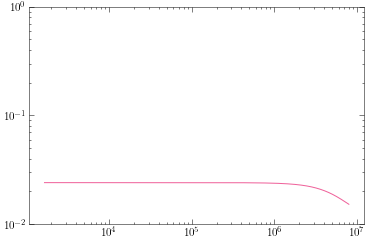

In [3]:
plt.loglog(r_vals, B_vals)
plt.ylim(1e-2, 1)
plt.show()


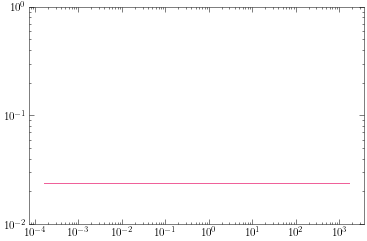

In [6]:
plt.loglog(r_vals_c, np.sqrt(1.0 - B_vals_c))
plt.ylim(1e-2, 1)
plt.show()


# WDs from Observation

In [13]:
T0 = 0
T1 = np.logspace(4, 8, 5)
T2 = np.logspace(7, 8, 10)
T_tot = np.append(T1, T2[1:-1])
T_tot = np.append(T0, T_tot)

In [14]:
T_tot

array([0.00000000e+00, 1.00000000e+04, 1.00000000e+05, 1.00000000e+06,
       1.00000000e+07, 1.00000000e+08, 1.29154967e+07, 1.66810054e+07,
       2.15443469e+07, 2.78255940e+07, 3.59381366e+07, 4.64158883e+07,
       5.99484250e+07, 7.74263683e+07])

In [7]:
# prof_data_0 = np.loadtxt('special_WDs/0.622_Msun/FMT_OC_0.0e+00K.dat', skiprows=1, delimiter='\t', unpack=True)
# prof_data_4 = np.loadtxt('special_WDs/0.622_Msun/FMT_OC_1.0e+04K.dat', skiprows=1, delimiter='\t', unpack=True)
# prof_data_5 = np.loadtxt('special_WDs/0.622_Msun/FMT_OC_1.0e+05K.dat', skiprows=1, delimiter='\t', unpack=True)
# prof_data_6 = np.loadtxt('special_WDs/0.622_Msun/FMT_OC_1.0e+06K.dat', skiprows=1, delimiter='\t', unpack=True)
# prof_data_7 = np.loadtxt('special_WDs/0.622_Msun/FMT_OC_1.0e+07K.dat', skiprows=1, delimiter='\t', unpack=True)
# prof_data_8 = np.loadtxt('special_WDs/0.622_Msun/FMT_OC_1.0e+08K.dat', skiprows=1, delimiter='\t', unpack=True)

prof_data_0 = np.loadtxt('special_WDs/1.1_Msun/FMT_OC_0.0e+00K.dat', skiprows=1, delimiter='\t', unpack=True)
prof_data_4 = np.loadtxt('special_WDs/1.1_Msun/FMT_OC_1.0e+04K.dat', skiprows=1, delimiter='\t', unpack=True)
prof_data_5 = np.loadtxt('special_WDs/1.1_Msun/FMT_OC_1.0e+05K.dat', skiprows=1, delimiter='\t', unpack=True)
prof_data_6 = np.loadtxt('special_WDs/1.1_Msun/FMT_OC_1.0e+06K.dat', skiprows=1, delimiter='\t', unpack=True)
prof_data_7 = np.loadtxt('special_WDs/1.1_Msun/FMT_OC_1.0e+07K.dat', skiprows=1, delimiter='\t', unpack=True)
prof_data_8 = np.loadtxt('special_WDs/1.1_Msun/FMT_OC_1.0e+08K.dat', skiprows=1, delimiter='\t', unpack=True)


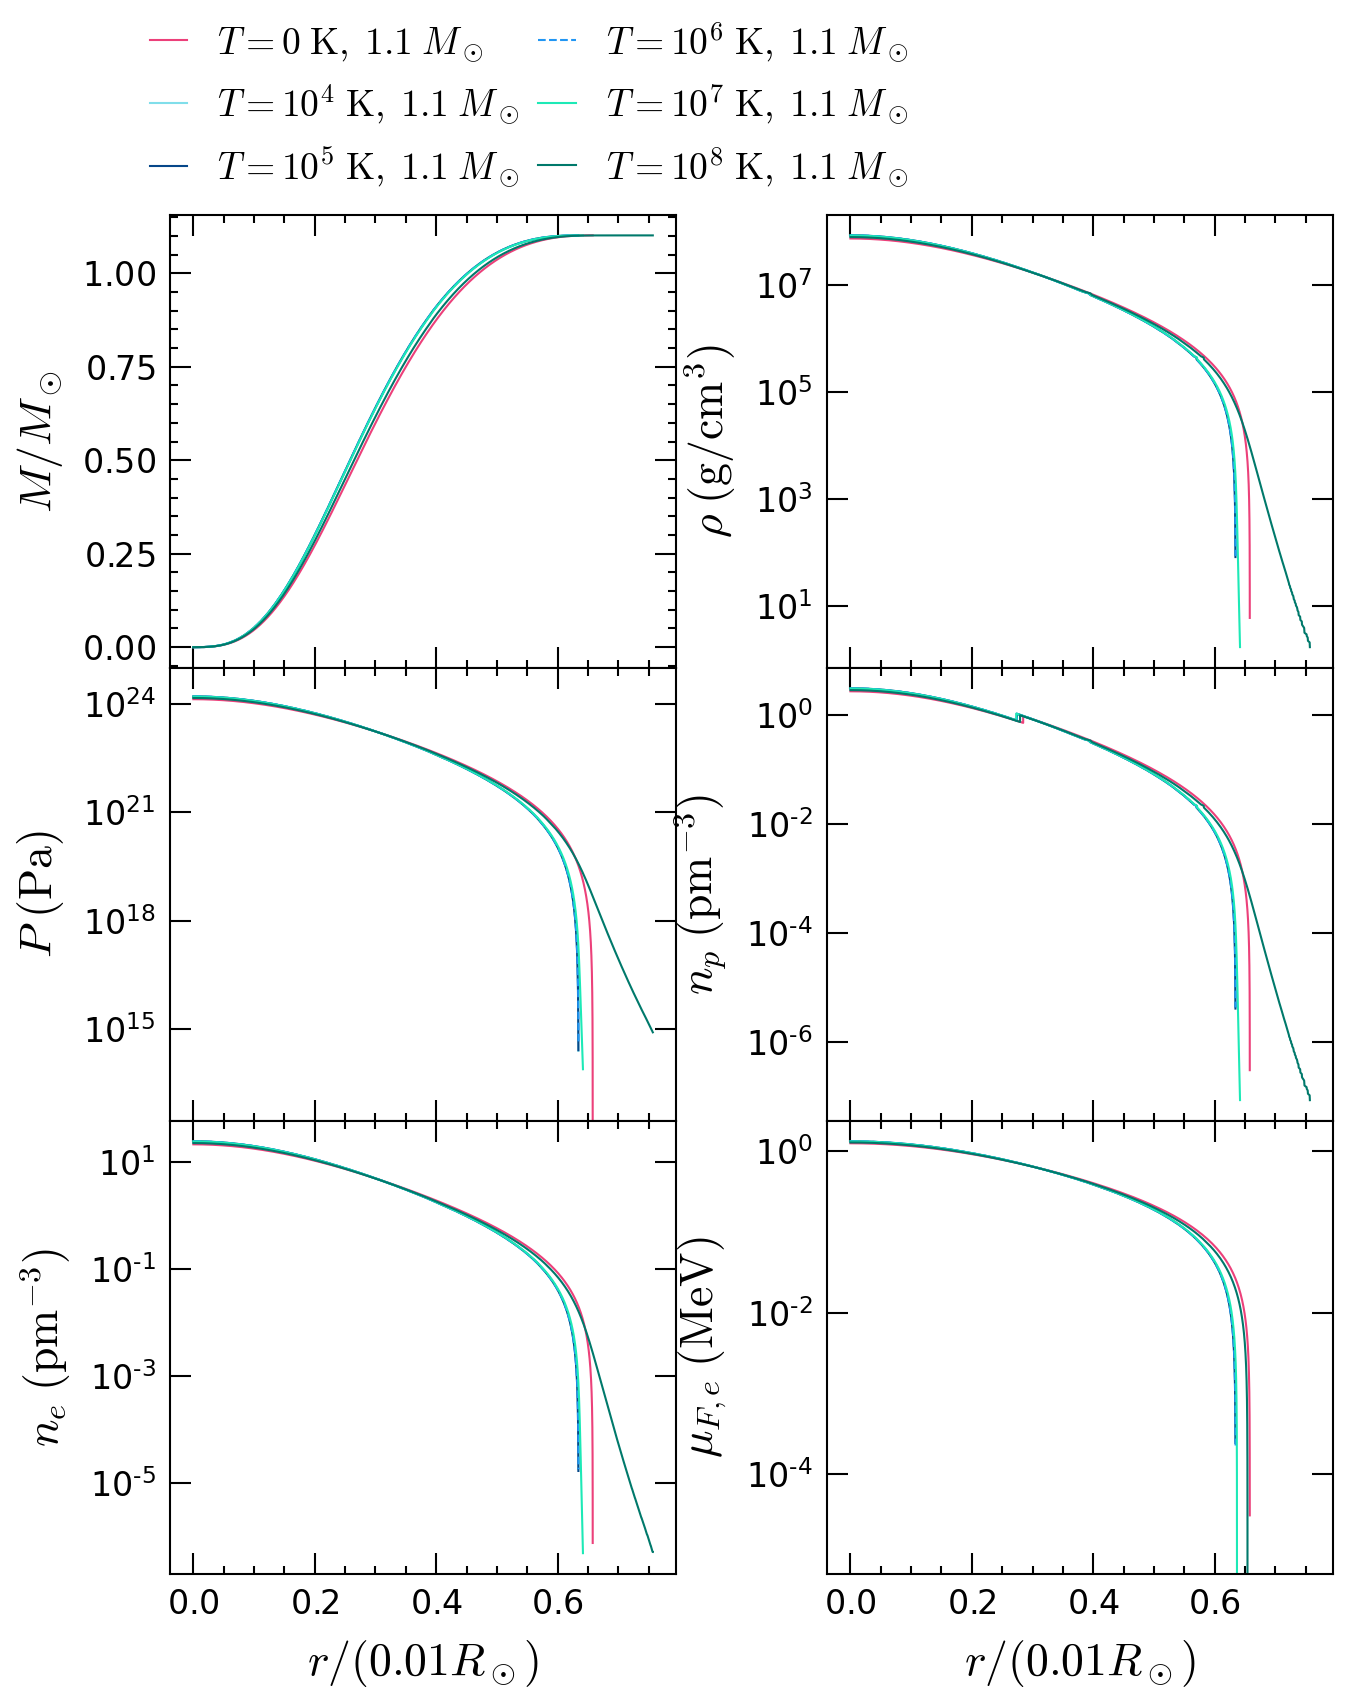

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(5, 6))
fig.subplots_adjust(hspace=0, wspace=0.3)


ax[0, 0].plot(prof_data_0[0]/0.01/Rsol, prof_data_0[1], label=r'$T = 0 \;\mathrm{K},\;1.1\;M_\odot$')
ax[0, 1].plot(prof_data_0[0]/0.01/Rsol, prof_data_0[2])
ax[1, 0].plot(prof_data_0[0]/0.01/Rsol, prof_data_0[3])
ax[1, 1].plot(prof_data_0[0]/0.01/Rsol, prof_data_0[5])
ax[2, 0].plot(prof_data_0[0]/0.01/Rsol, prof_data_0[4])
ax[2, 1].plot(prof_data_0[0]/0.01/Rsol, prof_data_0[6])

ax[0, 0].plot(prof_data_4[0]/0.01/Rsol, prof_data_4[1], label=r'$T = 10^4 \;\mathrm{K},\;1.1\;M_\odot$')
ax[0, 1].plot(prof_data_4[0]/0.01/Rsol, prof_data_4[2])
ax[1, 0].plot(prof_data_4[0]/0.01/Rsol, prof_data_4[3])
ax[1, 1].plot(prof_data_4[0]/0.01/Rsol, prof_data_4[5])
ax[2, 0].plot(prof_data_4[0]/0.01/Rsol, prof_data_4[4])
ax[2, 1].plot(prof_data_4[0]/0.01/Rsol, prof_data_4[6])

ax[0, 0].plot(prof_data_5[0]/0.01/Rsol, prof_data_5[1], label=r'$T = 10^5 \;\mathrm{K},\;1.1\;M_\odot$')
ax[0, 1].plot(prof_data_5[0]/0.01/Rsol, prof_data_5[2])
ax[1, 0].plot(prof_data_5[0]/0.01/Rsol, prof_data_5[3])
ax[1, 1].plot(prof_data_5[0]/0.01/Rsol, prof_data_5[5])
ax[2, 0].plot(prof_data_5[0]/0.01/Rsol, prof_data_5[4])
ax[2, 1].plot(prof_data_5[0]/0.01/Rsol, prof_data_5[6])

ax[0, 0].plot(prof_data_6[0]/0.01/Rsol, prof_data_6[1], label=r'$T = 10^6 \;\mathrm{K},\;1.1\;M_\odot$', ls = '--')
ax[0, 1].plot(prof_data_6[0]/0.01/Rsol, prof_data_6[2], ls = '--')
ax[1, 0].plot(prof_data_6[0]/0.01/Rsol, prof_data_6[3], ls='--')
ax[1, 1].plot(prof_data_6[0]/0.01/Rsol, prof_data_6[5], ls='--')
ax[2, 0].plot(prof_data_6[0]/0.01/Rsol, prof_data_6[4], ls='--')
ax[2, 1].plot(prof_data_6[0]/0.01/Rsol, prof_data_6[6], ls = '--')

ax[0, 0].plot(prof_data_7[0]/0.01/Rsol, prof_data_7[1], label = r'$T= 10^7\;\mathrm{K},\;1.1\;M_\odot$')
ax[0, 1].plot(prof_data_7[0]/0.01/Rsol, prof_data_7[2])
ax[1, 0].plot(prof_data_7[0]/0.01/Rsol, prof_data_7[3])
ax[1, 1].plot(prof_data_7[0]/0.01/Rsol, prof_data_7[5])
ax[2, 0].plot(prof_data_7[0]/0.01/Rsol, prof_data_7[4])
ax[2, 1].plot(prof_data_7[0]/0.01/Rsol, prof_data_7[6])

ax[0, 0].plot(prof_data_8[0]/0.01/Rsol, prof_data_8[1], label = r'$T= 10^8\;\mathrm{K},\;1.1\;M_\odot$')
ax[0, 1].plot(prof_data_8[0]/0.01/Rsol, prof_data_8[2])
ax[1, 0].plot(prof_data_8[0]/0.01/Rsol, prof_data_8[3])
ax[1, 1].plot(prof_data_8[0]/0.01/Rsol, prof_data_8[5])
ax[2, 0].plot(prof_data_8[0]/0.01/Rsol, prof_data_8[4])
ax[2, 1].plot(prof_data_8[0]/0.01/Rsol, prof_data_8[6])

ax[2, 0].set_xlabel(r'$r/(0.01R_\odot)$')
ax[2, 1].set_xlabel(r'$r/(0.01R_\odot)$')

ax[0, 0].set_ylabel(r'$M/M_\odot$')
ax[0, 1].set_ylabel(r'$\rho\;(\mathrm{g/cm^3})$')
ax[1, 0].set_ylabel(r'$P\;(\mathrm{Pa})$')
ax[1, 1].set_ylabel(r'$n_p\;(\mathrm{pm}^{-3})$')
ax[2, 0].set_ylabel(r'$n_e\;(\mathrm{pm}^{-3})$')
ax[2, 1].set_ylabel(r'$\mu_{F,e}\;(\mathrm{MeV})$')


ax[0, 1].set_yscale('log')
ax[0, 1].set_yscale('log')
ax[1, 0].set_yscale('log')
ax[1, 1].set_yscale('log')
ax[2, 0].set_yscale('log')
ax[2, 1].set_yscale('log')

# ax[0, 1].set_ylim(2e2, 5e9)
ax[1, 0].set_ylim(3e12, 1e25)
# ax[2, 0].set_ylim(5e-3, 5e2)
# ax[1, 1].set_ylim(5e-3, 5e2)

fig.legend(ncol = 2, loc = (0.1, 0.88))

plt.savefig('plots/1.1_Msun_profs.pdf')

In [3]:
file = open('../WD_data/seq_060_thick.dat')
Lines = file.readlines()
file.close()

Teff_thick= np.array([])         
Log_g_thick= np.array([])          
R_thick= np.array([])            
Age_thick= np.array([])            
L_thick= np.array([])
Log_Tc_thick= np.array([])       
Log_Pc_thick= np.array([])      
Log_rhoc_thick= np.array([])       
Mx_M_thick= np.array([])         
Log_qx_thick= np.array([])
Lnu_thick= np.array([])        
Log_H_thick= np.array([])      
Log_He_thick= np.array([])   
Log_C_thick= np.array([])      
Log_O_thick= np.array([])

mod = 1

for ll in Lines[5:]:

    lline = ll.split()
    try:
        mod = int(lline[0])

        # if mod_new == mod:

        Teff_thick = np.append(Teff_thick, float(lline[1]))
        Log_g_thick = np.append(Log_g_thick, float(lline[2]))
        R_thick = np.append(R_thick, float(lline[3]))
        Age_thick = np.append(Age_thick, float(lline[4]))
        L_thick = np.append(L_thick, float(lline[5]))

        new_line = 0

    except:
        if new_line == 0:
            Log_Tc_thick = np.append(Log_Tc_thick, float(lline[0]))
            Log_Pc_thick = np.append(Log_Pc_thick, float(lline[1]))
            Log_rhoc_thick = np.append(Log_rhoc_thick, float(lline[2]))
            Mx_M_thick = np.append(Mx_M_thick, float(lline[3]))
            Log_qx_thick = np.append(Log_qx_thick, float(lline[4]))
            new_line  += 1

        else:
            Lnu_thick = np.append(Lnu_thick, float(lline[0]))
            Log_H_thick = np.append(Log_H_thick, float(lline[1]))
            Log_He_thick = np.append(Log_He_thick, float(lline[2]))
            Log_C_thick = np.append(Log_C_thick, float(lline[3]))
            Log_O_thick = np.append(Log_O_thick, float(lline[4]))
        # print(lline)


In [4]:
file = open('../WD_data/seq_060_thin.dat')
Lines = file.readlines()
file.close()

Teff_thin= np.array([])         
Log_g_thin= np.array([])          
R_thin= np.array([])            
Age_thin= np.array([])            
L_thin= np.array([])
Log_Tc_thin= np.array([])       
Log_Pc_thin= np.array([])      
Log_rhoc_thin= np.array([])       
Mx_M_thin= np.array([])         
Log_qx_thin= np.array([])
Lnu_thin= np.array([])        
Log_H_thin= np.array([])      
Log_He_thin= np.array([])   
Log_C_thin= np.array([])      
Log_O_thin= np.array([])

mod = 1

for ll in Lines[5:]:

    lline = ll.split()
    try:
        mod = int(lline[0])

        # if mod_new == mod:

        Teff_thin = np.append(Teff_thin, float(lline[1]))
        Log_g_thin = np.append(Log_g_thin, float(lline[2]))
        R_thin = np.append(R_thin, float(lline[3]))
        Age_thin = np.append(Age_thin, float(lline[4]))
        L_thin = np.append(L_thin, float(lline[5]))

        new_line = 0

    except:
        if new_line == 0:
            Log_Tc_thin = np.append(Log_Tc_thin, float(lline[0]))
            Log_Pc_thin = np.append(Log_Pc_thin, float(lline[1]))
            Log_rhoc_thin = np.append(Log_rhoc_thin, float(lline[2]))
            Mx_M_thin = np.append(Mx_M_thin, float(lline[3]))
            Log_qx_thin = np.append(Log_qx_thin, float(lline[4]))
            new_line  += 1

        else:
            Lnu_thin = np.append(Lnu_thin, float(lline[0]))
            Log_H_thin = np.append(Log_H_thin, float(lline[1]))
            Log_He_thin = np.append(Log_He_thin, float(lline[2]))
            Log_C_thin = np.append(Log_C_thin, float(lline[3]))
            Log_O_thin = np.append(Log_O_thin, float(lline[4]))
        # print(lline)


In [5]:
T_obs = 3222.0
t_cool= 11.27e9


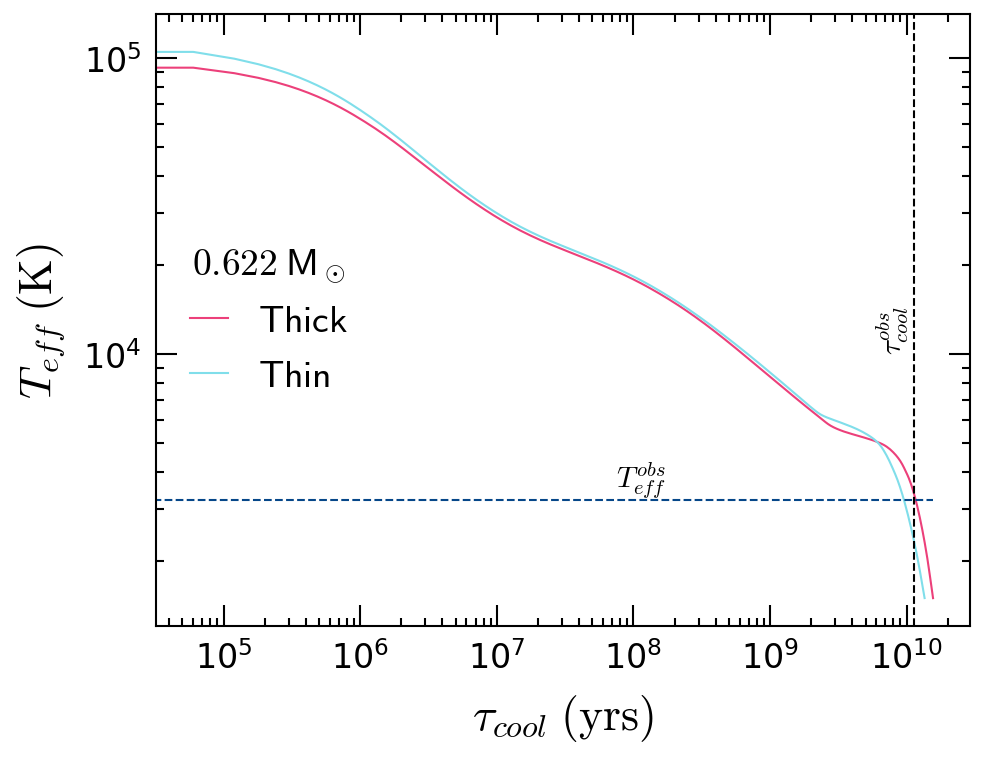

In [41]:
plt.loglog(Age_thick, Teff_thick, label = r"$\mathsf{Thick}$")
plt.loglog(Age_thin, Teff_thin, label=r"$\mathsf{Thin}$")
plt.axvline(t_cool, c='black', ls='--')
plt.plot(Age_thick, T_obs*np.ones(len(Age_thick)), ls = '--')
plt.xlabel(r'$\tau_{cool}\;(\mathrm{yrs})$')
plt.ylabel(r'$T_{eff}\;(\mathrm{K})$')
plt.legend(title = r'$\mathsf{0.622\;M}_\odot$')
plt.annotate(r'$T_{eff}^{obs}$', xy = (Age_thick[70], T_obs), xytext = (0, 3), textcoords = 'offset points', fontsize = 7)
plt.annotate(r'$\tau_{cool}^{obs}$', xy=(t_cool, 1e4), xytext=(-3, 0), textcoords='offset points', fontsize=7, rotation_mode='anchor', rotation=90)
plt.savefig('plots/0.622_Msun_cooling.pdf')


Text(0, 0.5, '$T_c\\;(\\mathrm{K})$')

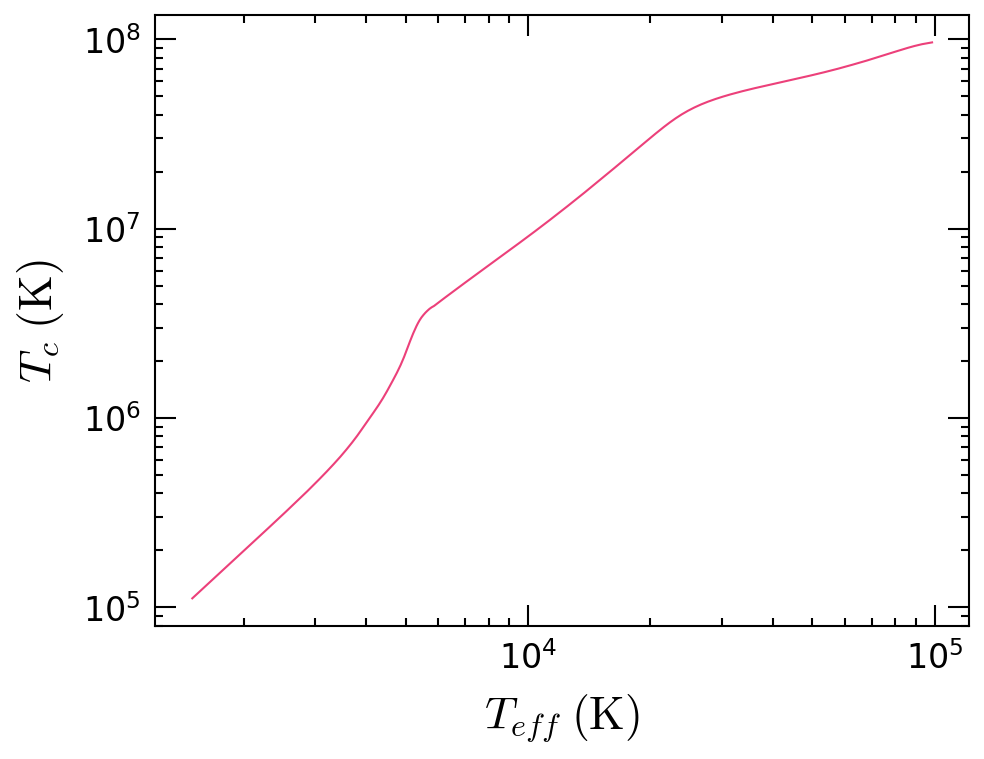

In [108]:
plt.loglog(Teff, 10**Log_Tc)
plt.xlabel(r'$T_{eff}\;(\mathrm{K})$')
plt.ylabel(r'$T_c\;(\mathrm{K})$')


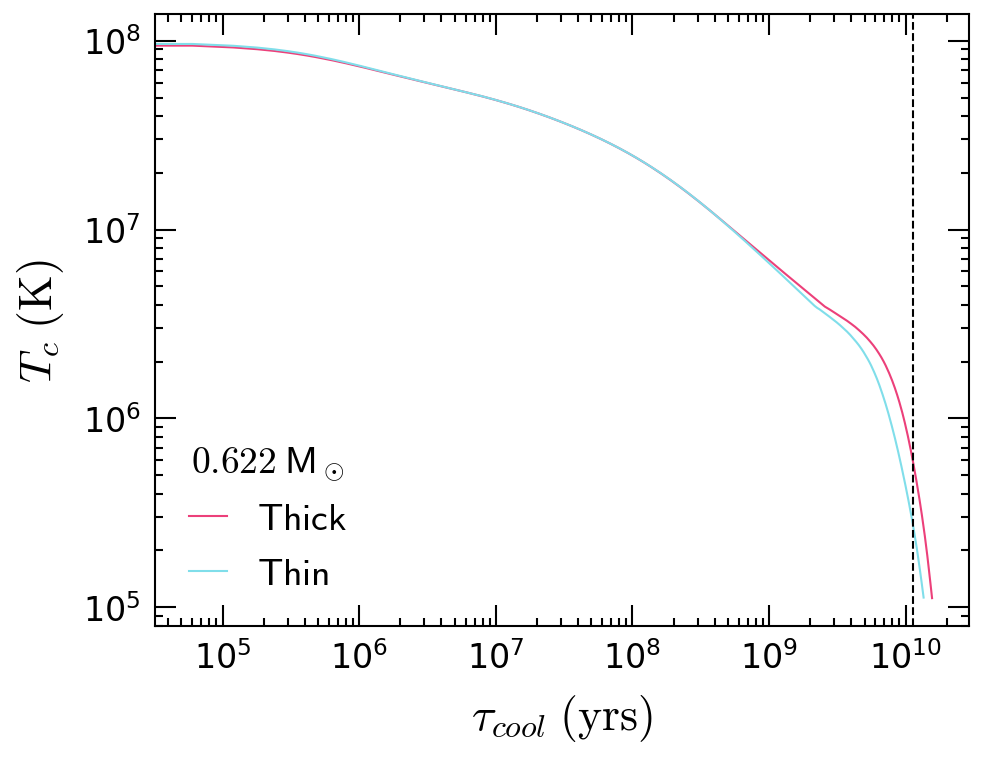

In [42]:
plt.loglog(Age_thick, 10**Log_Tc_thick, label=r"$\mathsf{Thick}$")
plt.loglog(Age_thin, 10**Log_Tc_thin, label=r"$\mathsf{Thin}$")
plt.axvline(11.27e9, c = 'black', ls = '--')
plt.xlabel(r'$\tau_{cool}\;(\mathrm{yrs})$')
plt.ylabel(r'$T_c\;(\mathrm{K})$')
plt.legend(title=r'$\mathsf{0.622\;M}_\odot$')
plt.savefig('plots/0.622_Msun_Tc.pdf')


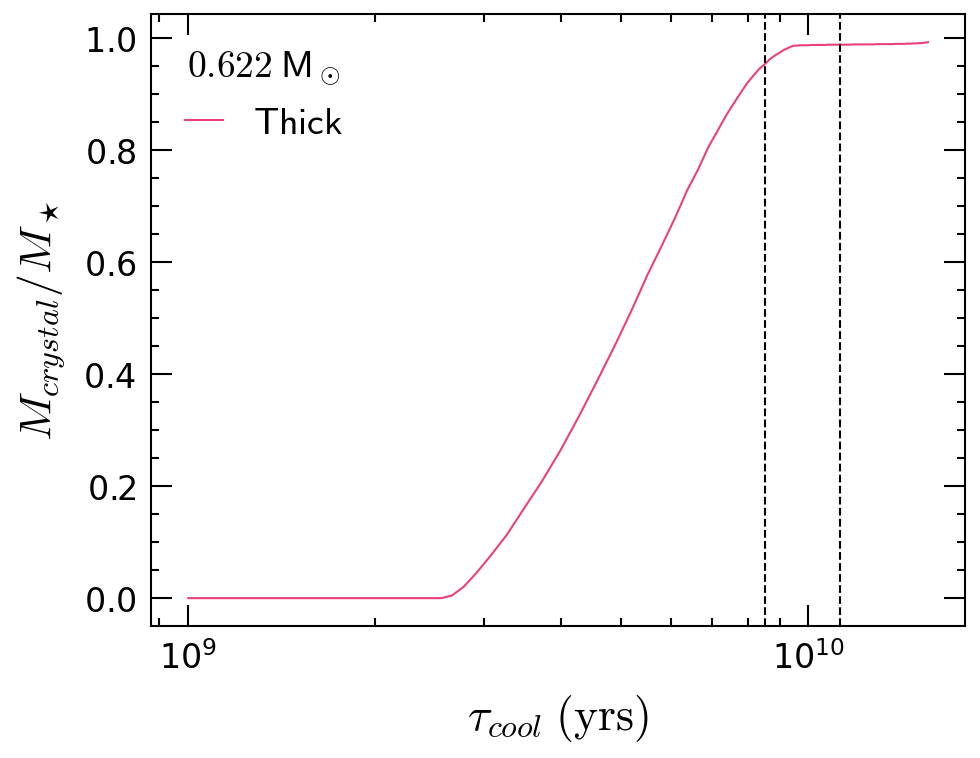

In [34]:
plt.plot(Age_thick[Age_thick > 1e9], Mx_M_thick[Age_thick > 1e9], label=r"$\mathsf{Thick}$")
# plt.plot(Age_thin, Mx_M_thin, label=r"$\mathsf{Thin}$")

plt.xscale('log')

plt.axvline(11.27e9, c='black', ls='--')
plt.axvline(np.min(Age_thick[Mx_M_thick > 0.95]), c='black', ls='--')
plt.xlabel(r'$\tau_{cool}\;(\mathrm{yrs})$')
plt.ylabel(r'$M_{crystal}/M_\star$')
plt.legend(title=r'$\mathsf{0.622\;M}_\odot$')


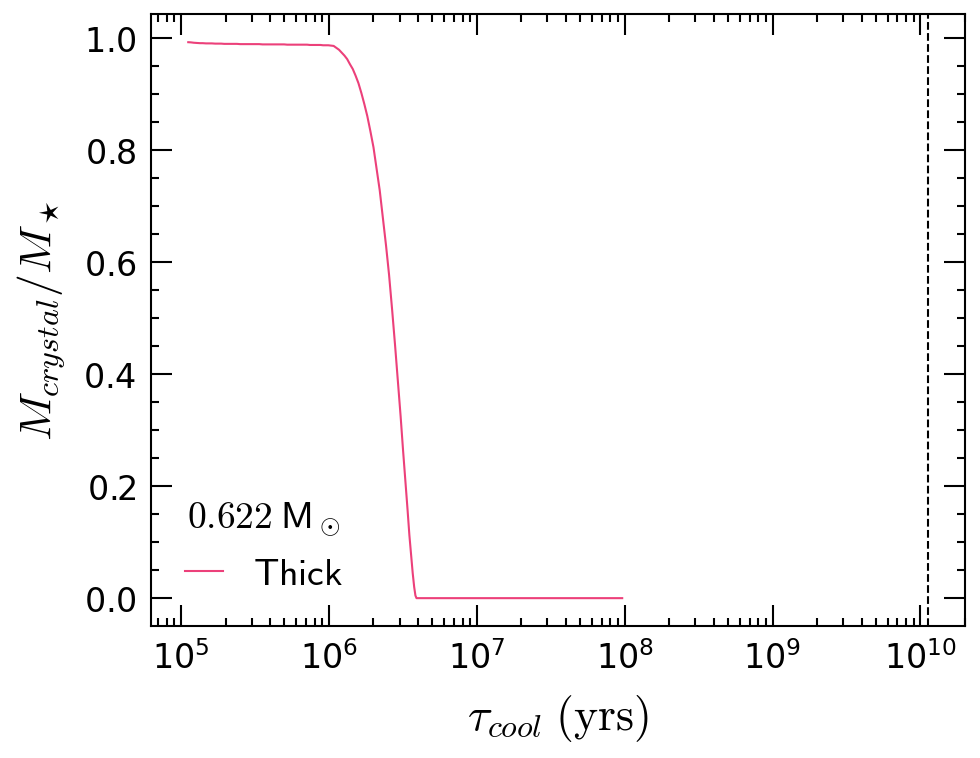

In [14]:
plt.plot(10**Log_Tc_thick, Mx_M_thick, label=r"$\mathsf{Thick}$")
# plt.plot(Age_thin, Mx_M_thin, label=r"$\mathsf{Thin}$")

plt.xscale('log')

plt.axvline(11.27e9, c='black', ls='--')
plt.xlabel(r'$\tau_{cool}\;(\mathrm{yrs})$')
plt.ylabel(r'$M_{crystal}/M_\star$')
plt.legend(title=r'$\mathsf{0.622\;M}_\odot$')

In [39]:
np.max(10**Log_Tc_thick[Mx_M_thick >= 0.95])

1385954.5864846576

In [38]:
np.min(Age_thick[Mx_M_thick >= 0.95])/1e9


8.511964

In [26]:
def log_g(M, R):

    """
    M in Msol
    R in m
    """

    return np.log10((GNewt * M*Msol / R**2 ) * (1.0 - (2.0 * GNewt * M*Msol) / (cspeed**2 * R)) * mTOcm )

In [30]:
WD_dat = mixed_WD('C', 'O', 4.642e5)

In [32]:
R = WD_dat.R_from_M(0.622)

In [13]:
test = mixed_WD('O', 'C', 6.31e7)


In [15]:
test.M_P0_rel(0.)

/home/student.unimelb.edu.au/mvirgato/White-Dwarf-TOV/TOV_script.py:467: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  


array(21.86892802)

In [16]:
elemInner = 'O'
elemOutter = 'C'
temp = 6.31e7

file = 'results/{}{}/{:0.3e}/mass_rad/MR.dat'.format(elemInner, elemOutter, temp)

data = pd.read_csv(file, header=0, sep='\t')

data = data.drop(data[data['M'] > 1.4].index)


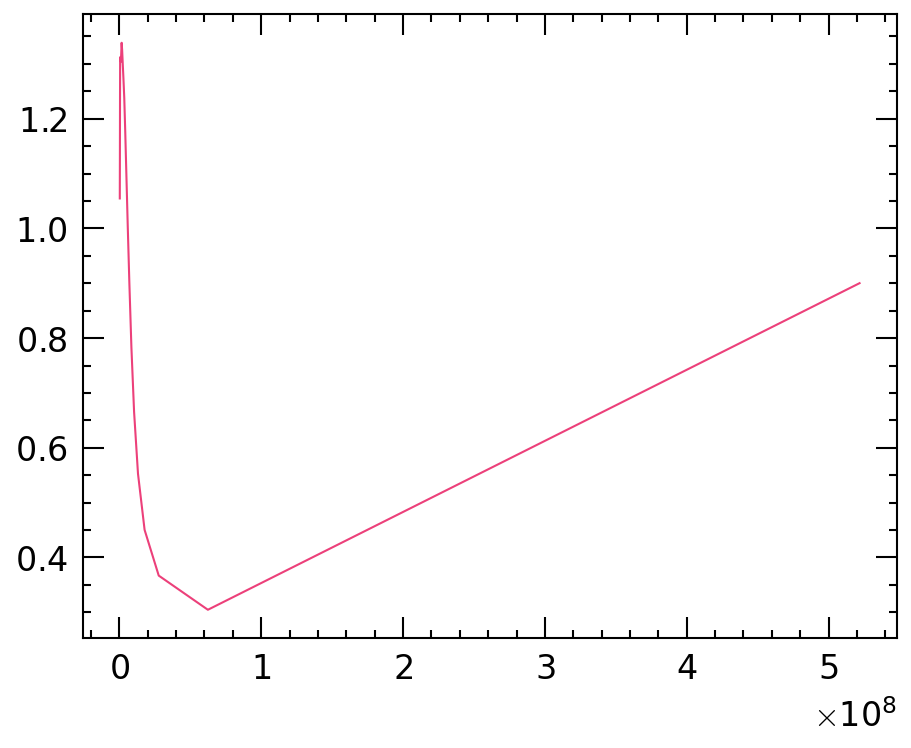

In [17]:
plt.plot(data['R'], data['M'])

In [9]:
np.linspace(0.2, 1.3, 23)

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
       0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25,
       1.3 ])

In [10]:
mass1 = 0.2
mass2 = 1.3
mass_inc = 0.05
mass_num = int((mass2 - mass1)/mass_inc) + 1


In [11]:
mass_num

23

# WD MR from GAIA


In [11]:
def surf_gravity(Rstar, Mstar):

    newt_part = GNewt * Mstar/2.0/Rstar**2

    return newt_part

def R_star(gsurf, Mstar):

    gsurf = gsurf * cmTOm
    Mstar = Mstar * Msol
    return np.sqrt(GNewt * Mstar / gsurf)

Load data.

$g$ in $cm\; s^{-1}$

In [26]:

Teff_H, log_g_H, mass_H = np.loadtxt('gaia_dr2_white_dwarf_candidates_v2.1.csv', skiprows=1, unpack=True, delimiter=',', usecols=(0, 2, 4), max_rows = 20000)

In [27]:
R0, M0, _a, _b= np.loadtxt('results/C/0.000e+00/mass_rad/MR.dat', skiprows=1, unpack=True)
R1, M1, _a, _b= np.loadtxt('results/C/1.000e+05/mass_rad/MR.dat', skiprows=1, unpack=True, max_rows=39)
R2, M2, _a, _b= np.loadtxt('results/C/1.000e+06/mass_rad/MR.dat', skiprows=1, unpack=True, max_rows=39)
R3, M3, _a, _b= np.loadtxt('results/C/1.000e+07/mass_rad/MR.dat', skiprows=1, unpack=True, max_rows=39)
R4, M4, _a, _b= np.loadtxt('results/C/1.000e+08/mass_rad/MR.dat', skiprows=1, unpack=True, max_rows=33)

# mask = mass_H < 1.3
spot_colours = Tcore(mass_H, Teff_H)

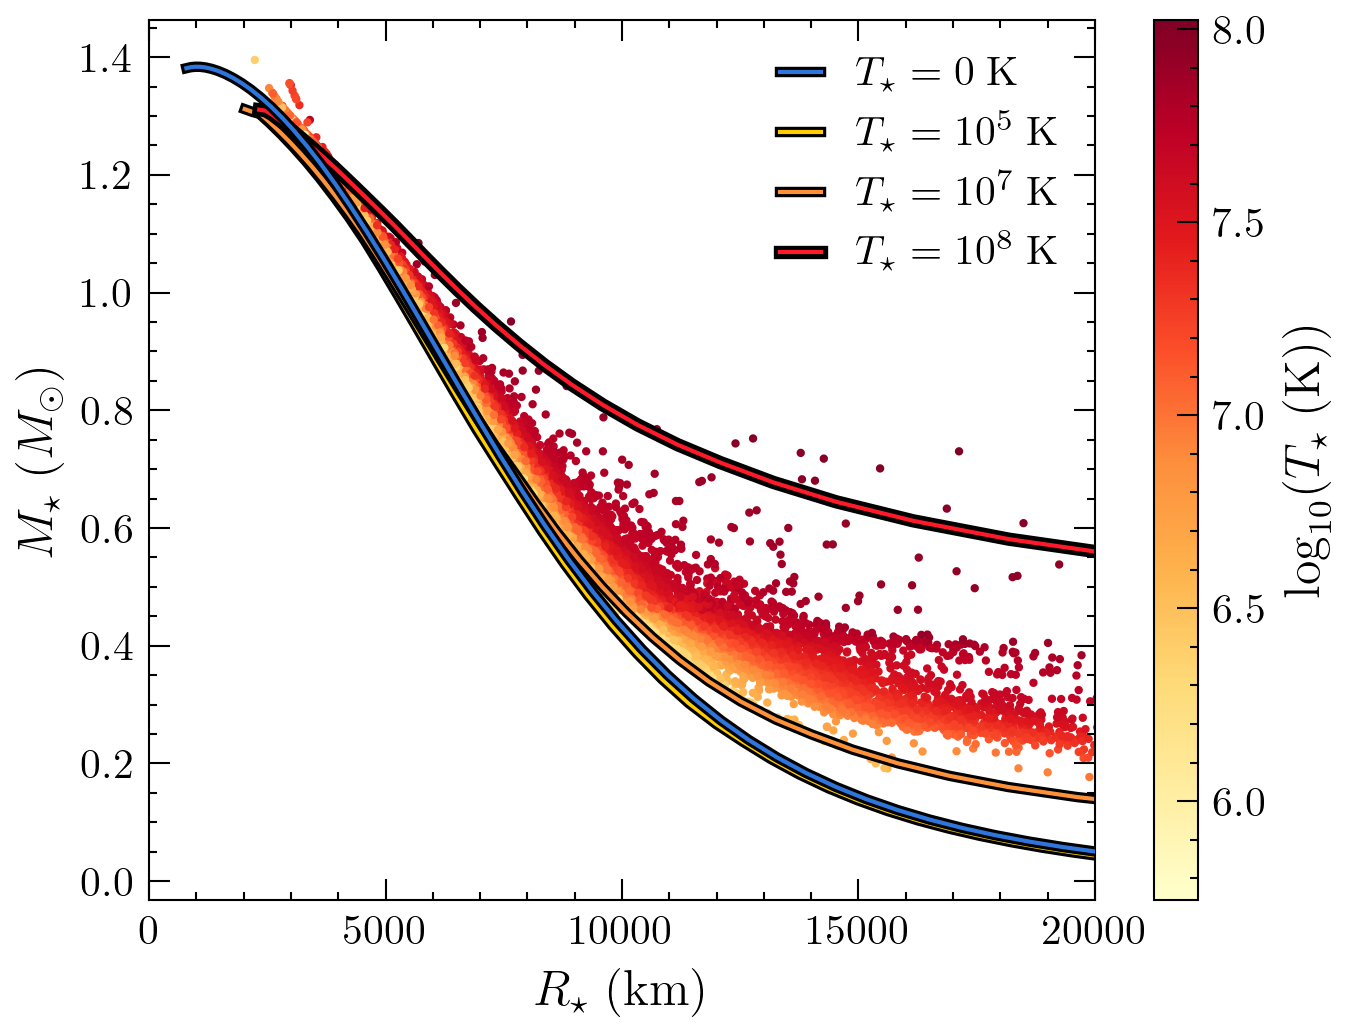

In [28]:
# WDs_DDR2 = plt.scatter(R_star(10**log_g_H, mass_H)*mTOkm, mass_H, c='C01', alpha = 0.1, label = r'$\mathrm{Gaia\; DR2}$')
    WDs_DDR2 = plt.scatter(R_star(10**log_g_H, mass_H)*mTOkm, mass_H, c=spot_colours, alpha = 1, cmap='YlOrRd')
plt.plot(R0/1000.0, M0, c = 'C04', label = r'$T_\star = 0\;\mathrm{K}$', lw = 1.0, path_effects=[pe.Stroke(linewidth=2.5, foreground='black'), pe.Normal()], zorder = 10) 
plt.plot(R1/1000.0, M1, c = 'C03', label = r'$T_\star = 10^5\;\mathrm{K}$', lw = 1.0, path_effects=[pe.Stroke(linewidth=2.5, foreground='black'), pe.Normal()], zorder = 1)
# plt.plot(R2/1000.0, M2) 
plt.plot(R3/1000.0, M3, c = 'C02', label = r'$T_\star = 10^7\;\mathrm{K}$', lw = 1.0, path_effects=[pe.Stroke(linewidth=2.5, foreground='black'), pe.Normal()], zorder = 1)
plt.plot(R4/1000.0, M4, c = 'C00', label = r'$T_\star = 10^8\;\mathrm{K}$', lw = 1.0, path_effects=[pe.Stroke(linewidth=3.2, foreground='black'), pe.Normal()], zorder = 1)
plt.xlim(0, 2e4)

plt.xlabel(r'$R_\star\;(\mathrm{km})$')
plt.ylabel(r'$M_\star\;(M_\odot)$')

cbar = plt.colorbar(WDs_DDR2)
cbar.set_label(r'$\log_{10}(T_\star\;\mathrm{(K)})$')
legend = plt.legend()
legend.legendHandles[0].set_alpha(1)
legend.legendHandles[0]._sizes = [20]

plt.savefig('plots/WD_mass_radius.pdf')

In [16]:

files = glob.glob('Berg_sequences/*thin.txt')
files = sorted(files)
mass_list_full = np.array([])
Teff_list_full = np.array([])
Tcore_list_full = np.array([])

# with open('berg_thin_tempertures.txt', 'w') as outfile:

    # temp_data = np.array([])
    # outfile.writelines('M\tTeff\tTcore\n')

for fname in files:

    mass = fname.lstrip('Berg_sequences/seq_')
    mass = mass.rstrip('_thin.txt')
    mass = float(mass)/100.0

    Tcore_list = np.array([])
    Teff_list = np.array([])

    with open(fname, 'r') as infile:

        line_num = 0
        Teffs = np.array([])
        Tcores = np.array([])

        for line in infile:

            parts = line.strip().split()
            
            if line_num < 5 or line_num % 3 == 1:
                pass
            
            elif line_num % 3 == 2:
                Teff_list = np.append(Teff_list, float(parts[1]))
                # Teff = float(parts[1])

            elif line_num % 3 == 0:
                Tcore_list = np.append(Tcore_list, 10**float(parts[0]))
                # Tcore = 10**float(parts[0])
                # outfile.writelines(f'{mass:0.3f}\t{Teff:0.5e}\t{Tcore:0.5e}\n')


                # parts = line.strip().split()
                # print(len(parts))
                # row_data = [ for x in parts]
            

            line_num +=1
        
        Tcore_list = Tcore_list[::-1]
        Teff_list = Teff_list[::-1]

        mass_list_full = np.append(mass_list_full, np.ones(len(Tcore_list))*mass)
        Teff_list_full = np.append(Teff_list_full, Teff_list)
        Tcore_list_full = np.append(Tcore_list_full, Tcore_list)
        # temp = np.vstack([np.ones(len(Teffs))*mass, Teffs, Tcores])

        # temp_data = np.append(temp_data, temp, axis = 1)
    # plt.loglog(Teffs, Tcores)

np.savetxt('berg_thin_tempertures.txt', np.transpose([mass_list_full, Teff_list_full, Tcore_list_full]), delimiter='\t', fmt = '%0.5e', header = 'M/Msun\tTeff_K\tTcore_K\n')


# plt.show()


In [13]:
masses, Teffs, Tcores = np.loadtxt('berg_thin_tempertures.txt', skiprows=2, unpack=True)

Tcore_interp = bisplrep(masses, np.log10(Teffs), np.log10(Tcores), s = 0.1)

def Tcore(mass, temp):
    
    ltemp = np.log10(temp)
    mass = np.array(mass)

    return np.array([bisplev(mass[ii], ltemp[ii], Tcore_interp) for ii in range(len(mass))])
